In [114]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.collocations import *
import nltk
nltk.download('genesis')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package genesis to
[nltk_data]     /Users/yejinkwon/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


In [50]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)

In [15]:
teacher_survey_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_teacher_survey.csv").sample(frac = 0.10)
#school_data = pd.read_csv("Donors_Choose_Data/donorschooseorg_challenge_school.csv").sample(frac = 0.30)
project_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_project.csv").sample(frac = 0.10)
resource_data = pd.read_csv("donorschooseorg_challenge/donorschooseorg_challenge_resource.csv").sample(frac = 0.10)

In [76]:
teacher_survey_data_1 = teacher_survey_data[["teacher_hashed_id", "school_hashed_id", "q3_num_refugee_students", "q5b_refugee_academic_perf", "q6a_refugee_attendance", "q8b_refugee_services_only", "q9b_external_refugee_services_open_ended"]]
project_data_1 = project_data[["teacher_hashed_id", "school_hashed_id", "project_hashed_id", "project_essay_one", "project_essay_two", "project_impact_letter", "project_cost"]]
resource_data_1 = resource_data[["project_hashed_id", "resource_name", "resource_category", "resource_unit_price"]] 

In [93]:
resource_data;

In [106]:
resources = resource_data["resource_name"]
contains_non_string = values[values.apply(type) != str].any()
print(contains_non_string)

False


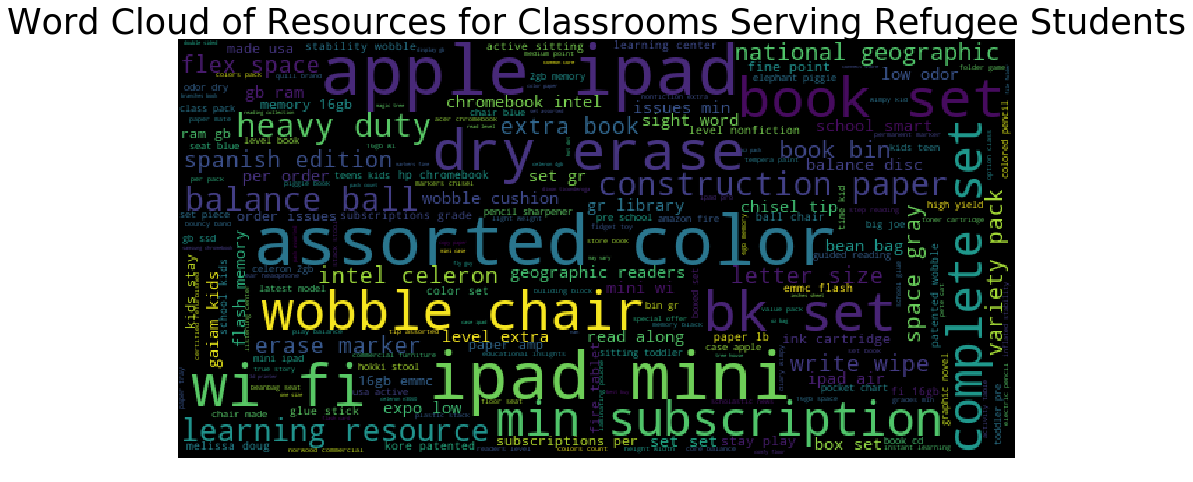

In [108]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(map(str, resources.values)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Resources for Classrooms Serving Refugee Students", fontsize=35)
plt.axis("off")
plt.show() 

In [117]:
# when identifying resources, how do we use nltk to identify phrases?
# then, how do we extract the most requested resources?
#source: https://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words("donorschooseorg_challenge/donorschooseorg_challenge_resource.csv"))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 10)  

OSError: No such file or directory: '/Users/yejinkwon/nltk_data/corpora/genesis/donorschooseorg_challenge/donorschooseorg_challenge_resource.csv'

In [13]:
teachers_with_refugee_students = teacher_survey_data_1.loc[teacher_survey_data["q3_num_refugee_students"] > 0]

34

In [111]:
projects_refugees = pd.merge(teachers_with_refugee_students, project_data_1, how="right", on=['teacher_hashed_id'])
projects_refugees_orig = pd.merge(projects_refugees, resource_data_1, how = "right", on=['project_hashed_id'])
projects_refugees_orig;
# there are extra rows with NaN's in the first few columns because there are more projects than teacher_survey responses
# should we filter specifically for materials?
# features that would be interesting to look into: external_refugee_services
# look at the teachers who say that their students are doing better, and then see if it's correlated to the kinds of 
# open ended services being offered
# try analyzing the q9b to see what kind of open_ended services are offered

In [19]:
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.3

nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yejinkwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
projects_refugees_resource_count = projects_refugees_orig.loc[:, ["resource_category"]].apply(pd.value_counts)
projects_refugees_resource_count;

In [60]:
project_impact = projects_refugees_orig.dropna(subset=["project_impact_letter"]).loc[:, ["project_impact_letter", "project_hashed_id"]].drop_duplicates()
#unsure as to why there are duplicates but I'm just going to go ahead and drop them now to do my analysis
project_impact;

In [65]:
prepared_project_impact = project_impact["project_impact_letter"].map(text_prepare)

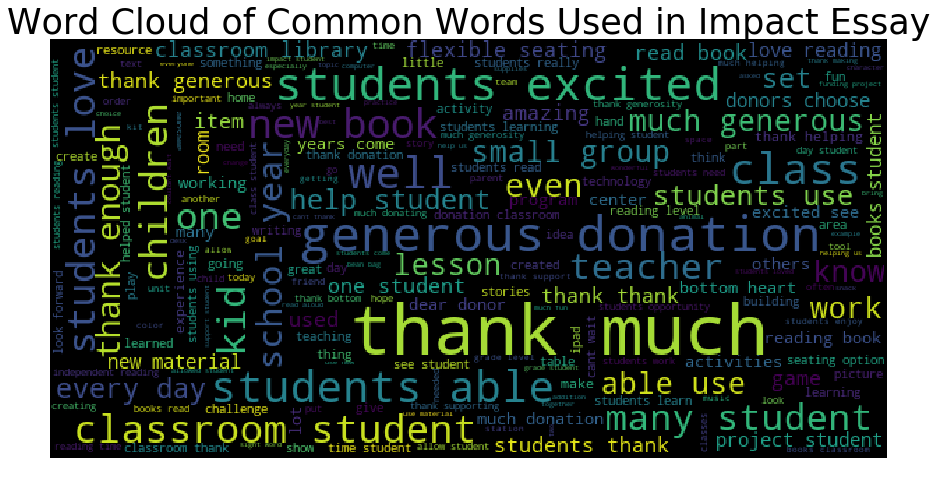

In [73]:
# look at the frequency of words in the impact statement using a word cloud to determine what kind of impact I want to look at
# source: https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose/notebook, 5.4 
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(prepared_project_impact.values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word Cloud of Common Words Used in Impact Essay", fontsize=35)
plt.axis("off")
plt.show() 

#realized that it was difficult to measure what impact really meant, so identifying popular words in the impact essay isn't too useful

In [ ]:
# im